In [112]:
import pandas as pd
import statsmodels.api as sm
import matplotlib

# 1.) Import Data from FRED

In [113]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [114]:
data.index = pd.to_datetime(data.index)

In [115]:
data.head()

,FedFunds,Unemployment,HousingStarts,Inflation
1947-01-01,NaN,NaN,NaN,21.48
1947-02-01,NaN,NaN,NaN,21.62
1947-03-01,NaN,NaN,NaN,22.00
1947-04-01,NaN,NaN,NaN,22.00
1947-05-01,NaN,NaN,NaN,21.95


In [116]:
data = data.dropna()
data.head()

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.01
1959-02-01,2.43,5.9,1667.0,29.00
1959-03-01,2.80,5.6,1620.0,28.97
1959-04-01,2.96,5.2,1590.0,28.98
1959-05-01,2.90,5.1,1498.0,29.04


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [117]:
split_1 = int(len(data)*.6)
split_2 = int(len(data)*.9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [118]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [119]:
# Add Constants (intercept term)
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [120]:
model1 = sm.OLS(y_in,X_in).fit()

# 4.) Recreate the graph fro your model

In [121]:
import matplotlib.pyplot as plt

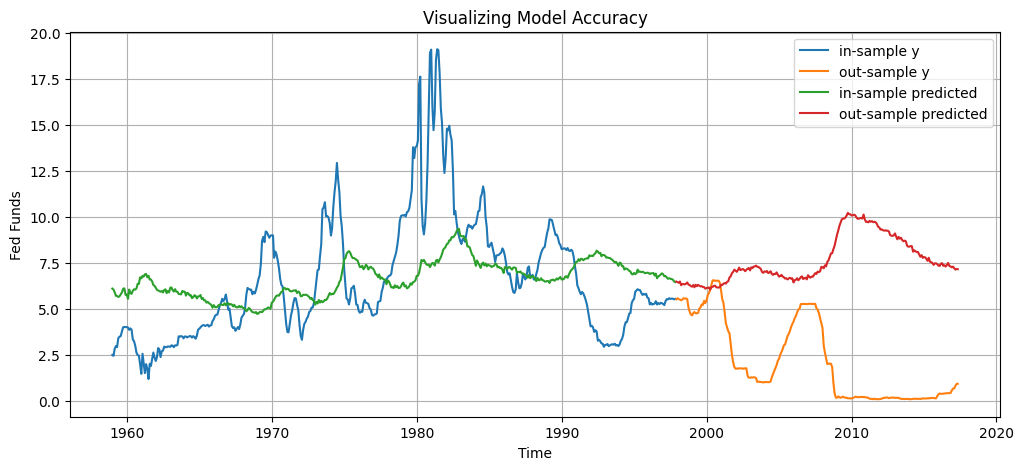

In [122]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in, label= "in-sample y")
plt.plot(y_out, label="out-sample y")
plt.plot(model1.predict(X_in), label="in-sample predicted")
plt.plot(model1.predict(X_out), label="out-sample predicted")
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend()
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [123]:
from sklearn.metrics import mean_squared_error

In [124]:
in_mse_1 = mean_squared_error(model1.predict(X_in),y_in)
out_mse_1 = mean_squared_error(model1.predict(X_out),y_out)

In [125]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168643
Outsample MSE :  40.3608278356685


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [126]:
from sklearn.preprocessing import PolynomialFeatures

In [127]:
max_degrees=3

DEGREE: 1


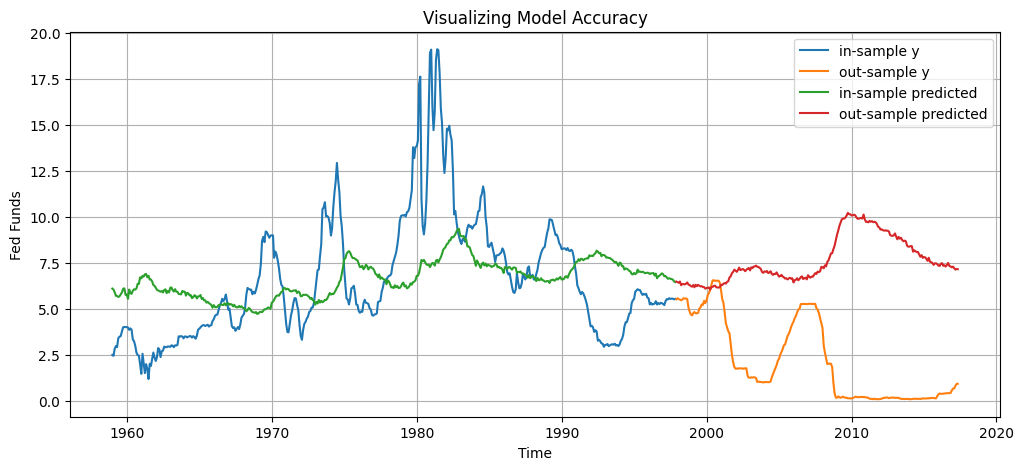

Insample MSE :  10.071422013168641
Outsample MSE :  40.36082783565204 

DEGREE: 2


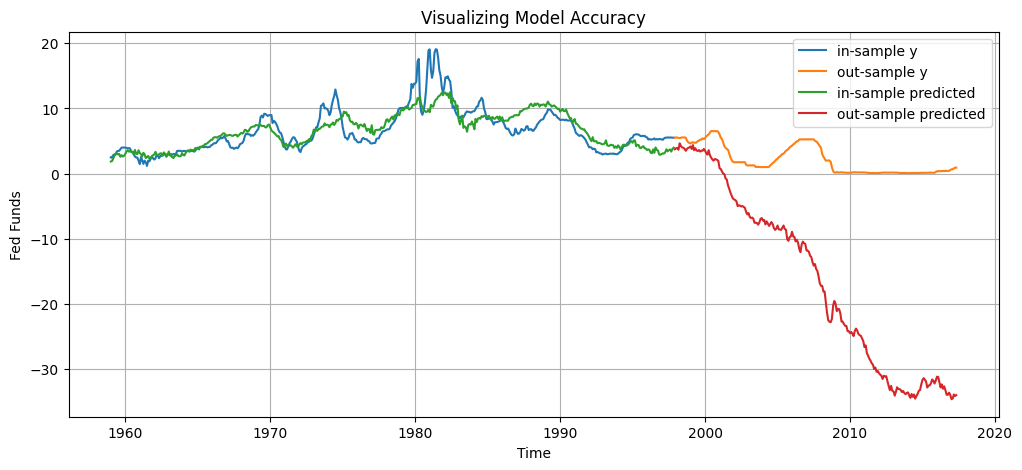

Insample MSE :  3.863477139276068
Outsample MSE :  481.4465099024405 

DEGREE: 3


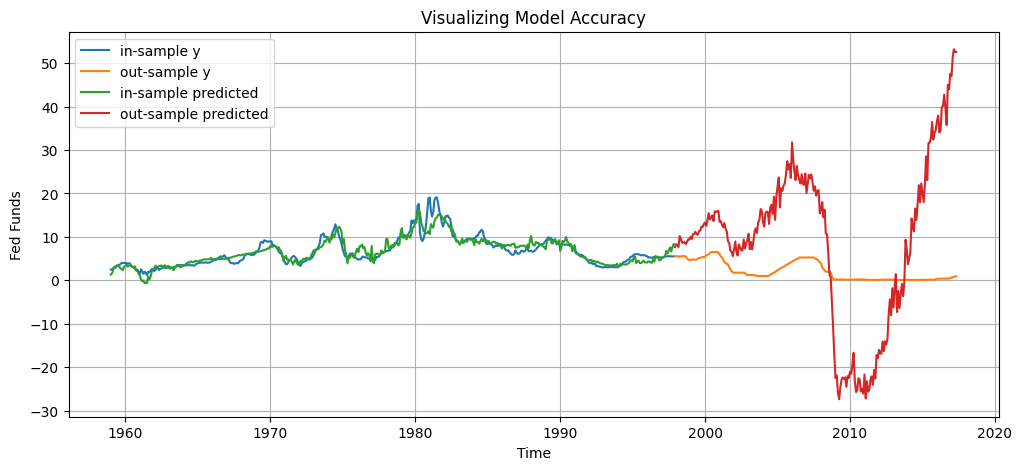

Insample MSE :  1.8723636288250916
Outsample MSE :  371.7672642959744 



In [129]:
for degrees in range(1,max_degrees+1):
    print("DEGREE:",degrees)
    poly=PolynomialFeatures(degree=degrees)
    X_in_poly=poly.fit_transform(X_in)
    X_out_poly=poly.fit_transform(X_out)
    
    model1=sm.OLS(y_in,X_in_poly).fit()
    
    plt.figure(figsize=(12,5))
    
    predicted_in=model1.predict(X_in_poly)
    predicted_in=pd.DataFrame(predicted_in, index=y_in.index)
    predicted_out=model1.predict(X_out_poly)
    predicted_out=pd.DataFrame(predicted_out, index=y_out.index)
    
    
    plt.plot(y_in, label="in-sample y")
    plt.plot(y_out, label="out-sample y")
    plt.plot(predicted_in, label="in-sample predicted")
    plt.plot(predicted_out, label="out-sample predicted")
    
    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend()
    plt.grid()
    plt.show()
    
    in_mse_1=mean_squared_error(model1.predict(X_in_poly),y_in)
    out_mse_1=mean_squared_error(model1.predict(X_out_poly),y_out)
    
    print("Insample MSE : ", in_mse_1)
    print("Outsample MSE : ", out_mse_1,"\n")

# 7.) State your observations :

We have three models here with, degrees varying from 1 to 3. We can see that the model with degree 1 poorly predicts the in-sample y variable as well as the out-sample y variable. For model with degree 2, the in-sample y is approximately predicted but the out-sample y, doesn't seem to be predicted effieicently in this model. Similarly, in the model with degree 3, the in-sample y is approximately predicted but the out-sample y is not predicted efficiently. All three models with degrees ranging from 1,2 and 3, either do not predict efficiently or they predict the training approximately and fails to predict out-sample output. We can observe that for model with degree 1, the MSE for both out and in sample are comparably low, but in the other cases with models of degree 2 and 3, the Insample MSE is significantly lower than the Outsample MSE, indicating a case of overfitting or high variance.